# Examen final - 27/09/2023
## Ejercicio 1

### Enunciado

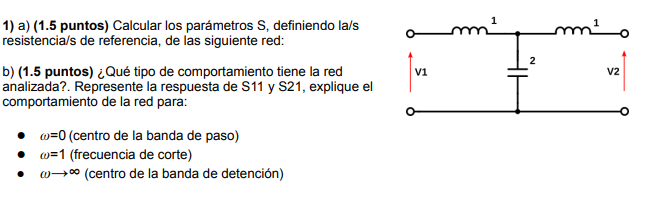

#### a. Calcular los parámetros S, definiendo la/s resistencias/s de referencia, de la red dada

##### Desarrollo tradicional

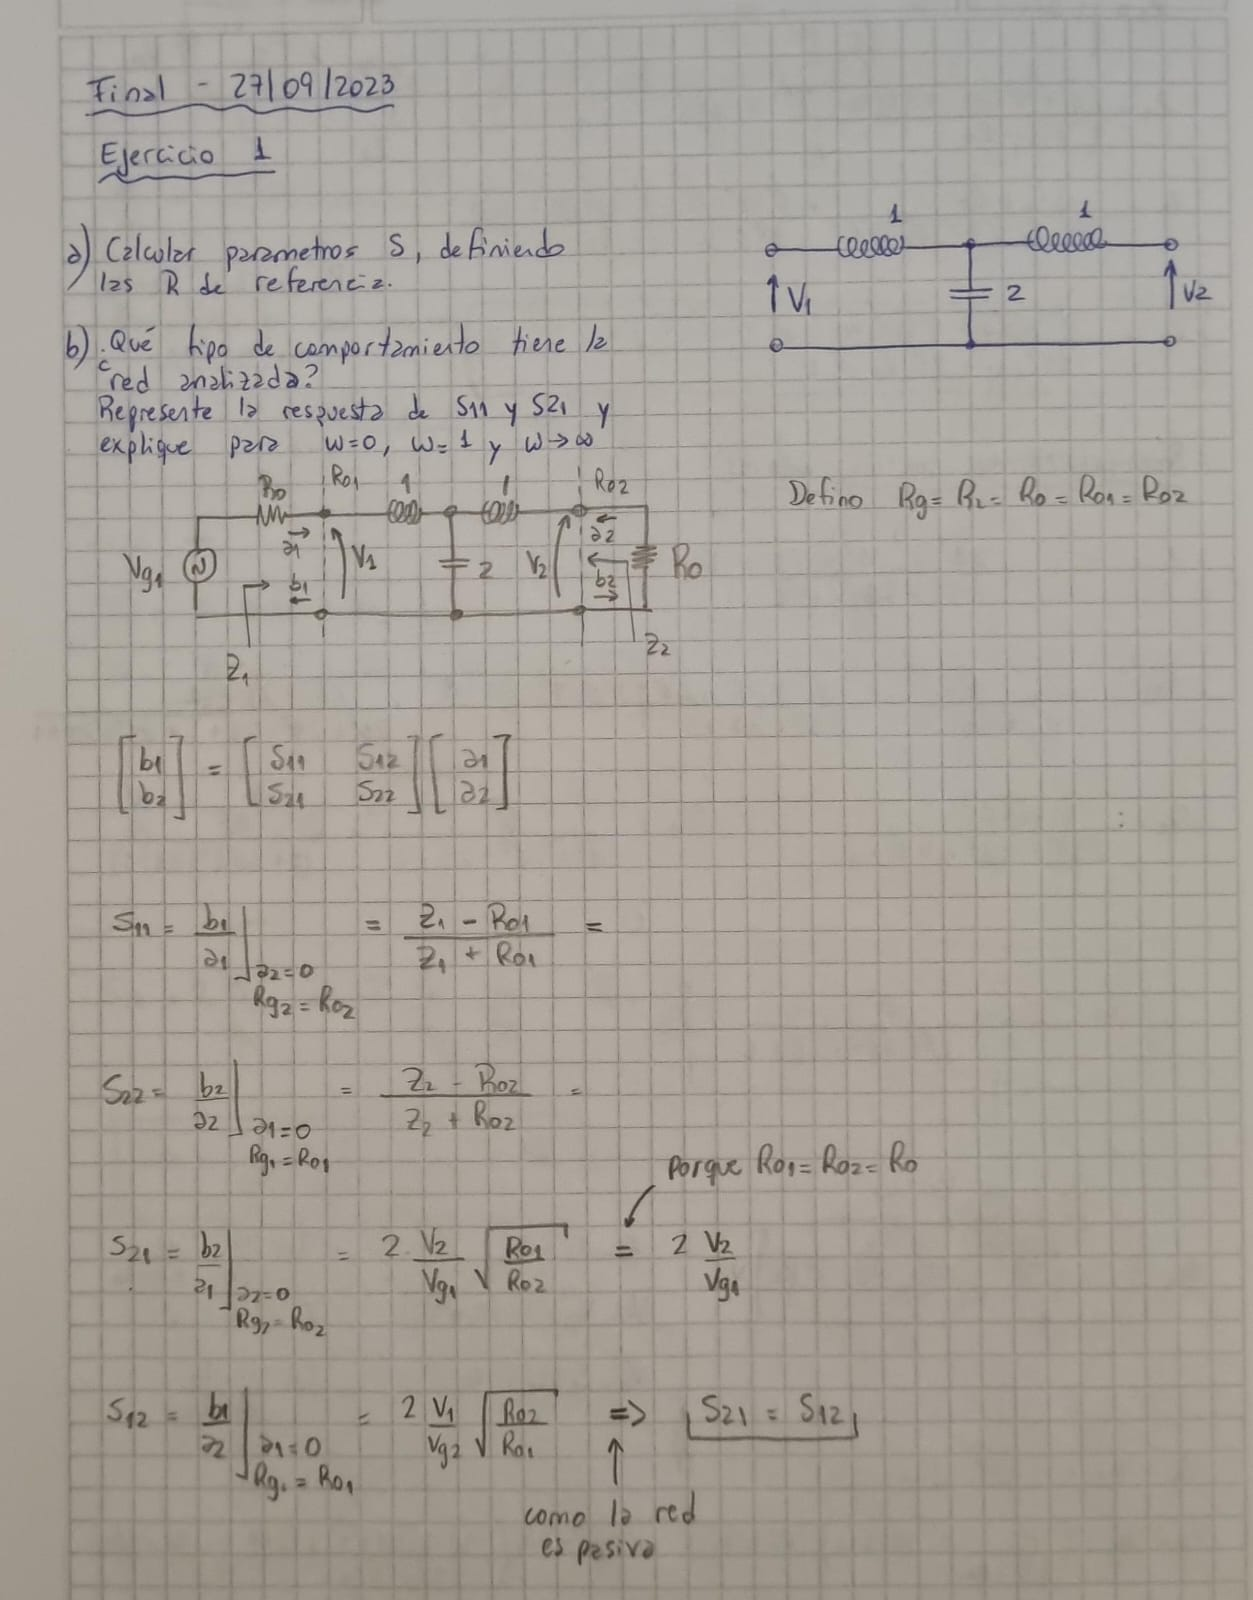

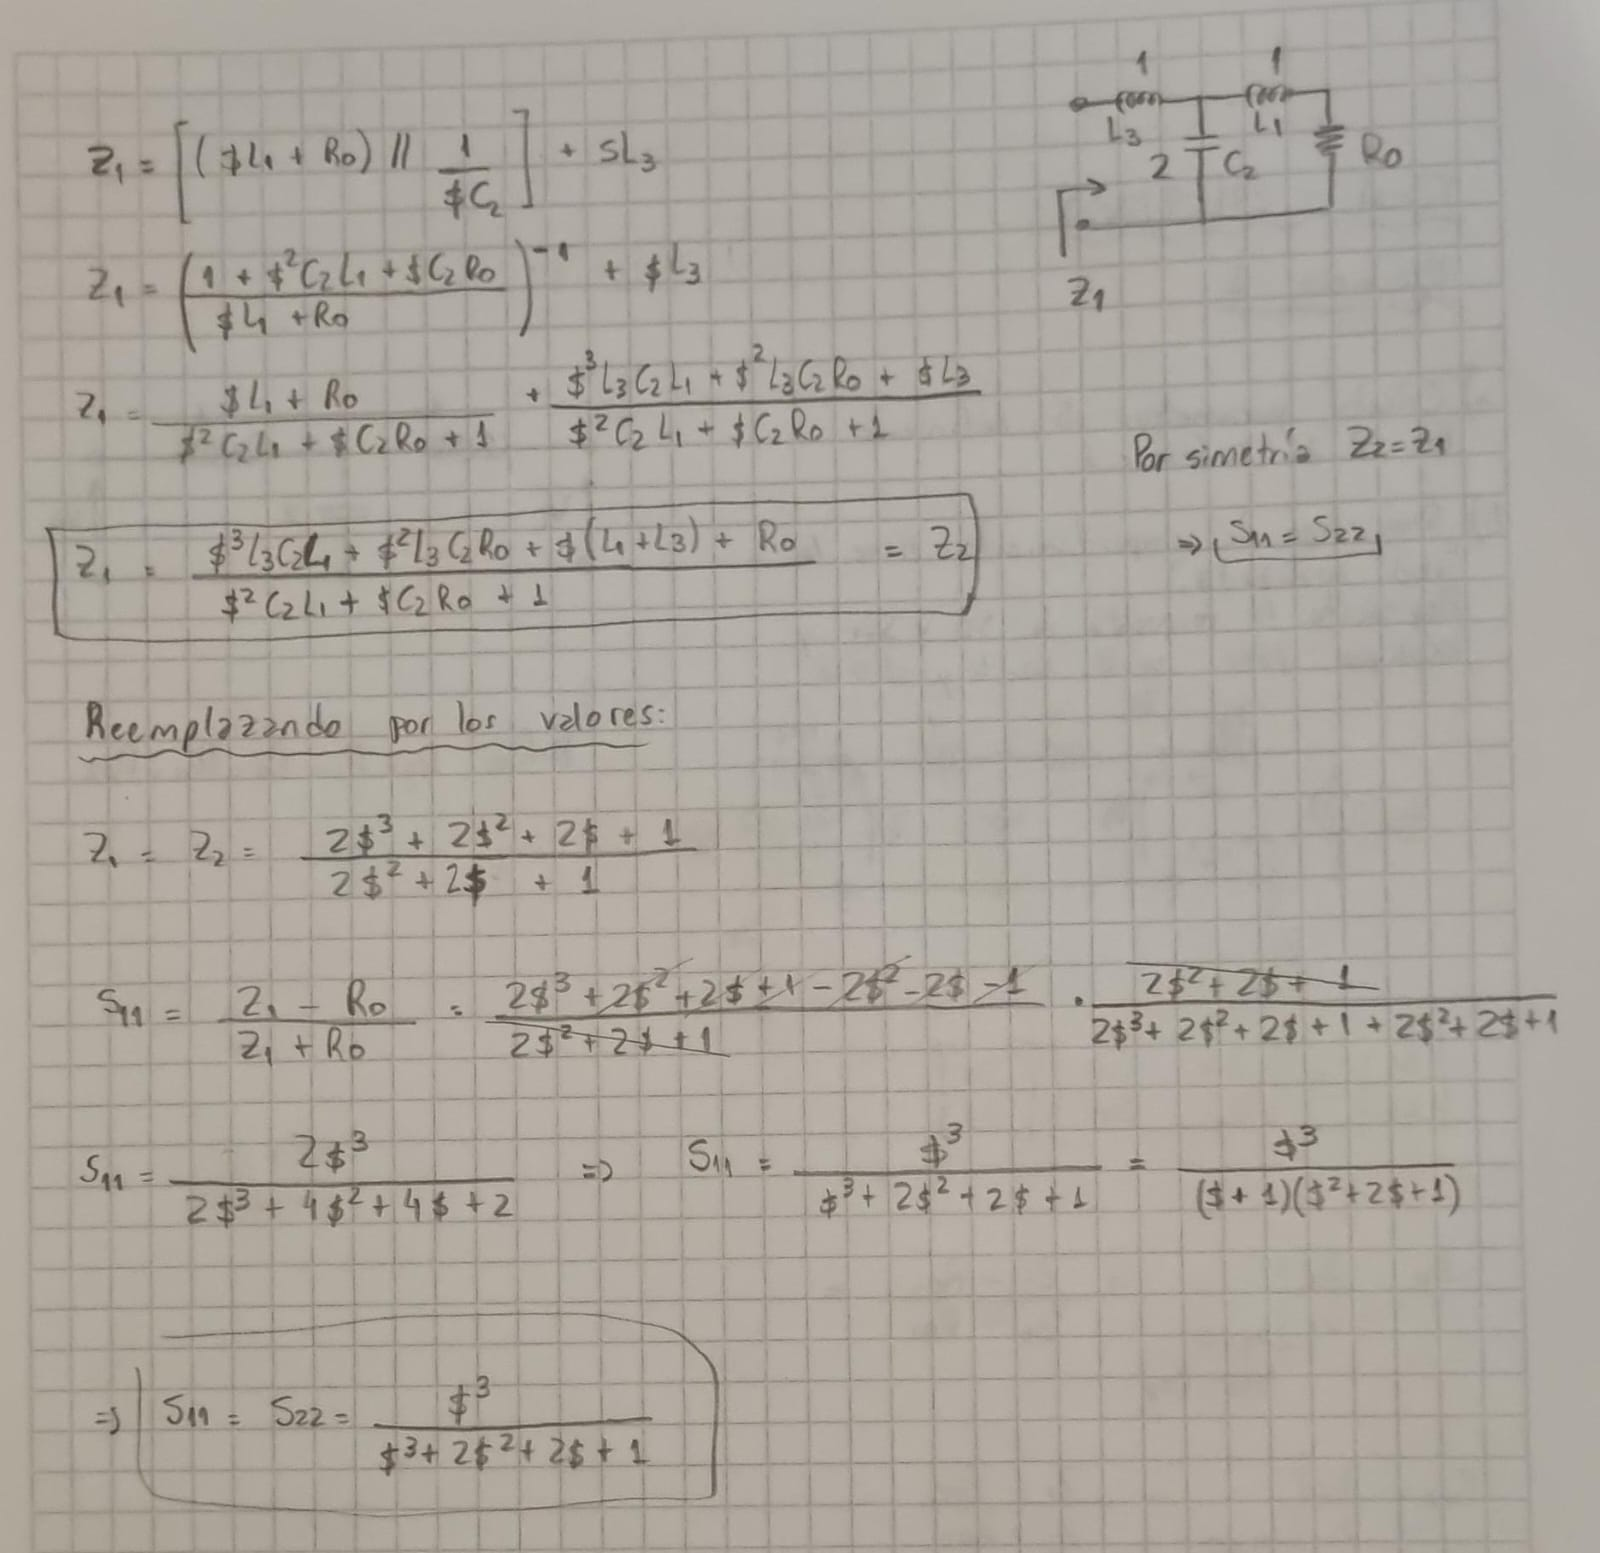

##### Comprobación mediante software

$$ Z_1 = \frac{s^3 L_3 C_2 L_1 + s^2 L_3 C_2 R_O + s (L_1 + L_3) + R_o}{s^2 C_2 L_1 + s C_2 R_O + 1} $$

In [ ]:
from sympy import *
from pytc2.sistemas_lineales import pretty_print_SOS
import numpy as np


s = symbols('s')


R_O1 = 1
S_11 = (20*s**2 + 12*s +2)/(30*s**2 + 14*s + 4)

Z = (2 * R_O1 * S_11) / (1 - S_11)
Z.simplify()

In [3]:
from sympy import *

s = symbols('s')

L_1 = 1
C_2 = 2
L_3 = 1
R_O = 1


A = L_3 * C_2 * L_1
B = L_3 * C_2 * R_O
C = L_1 + L_3
D = R_O

E = 0
F = C_2 * L_1
G = C_2 * R_O
H = 1

Z_1 = (A * s**3 + B * s**2 + C * s + D)/(E * s**3 + F * s**2 + G * s + H)

Z_1.simplify()

(2*s**3 + 2*s**2 + 2*s + 1)/(2*s**2 + 2*s + 1)

In [4]:
S_11 = (Z_1 - R_O) / (Z_1 + R_O)

S_11.simplify()

s**3/(s**3 + 2*s**2 + 2*s + 1)

Entonces, se verifica que $S_11$ cumple con lo calculado en el manuscrito.

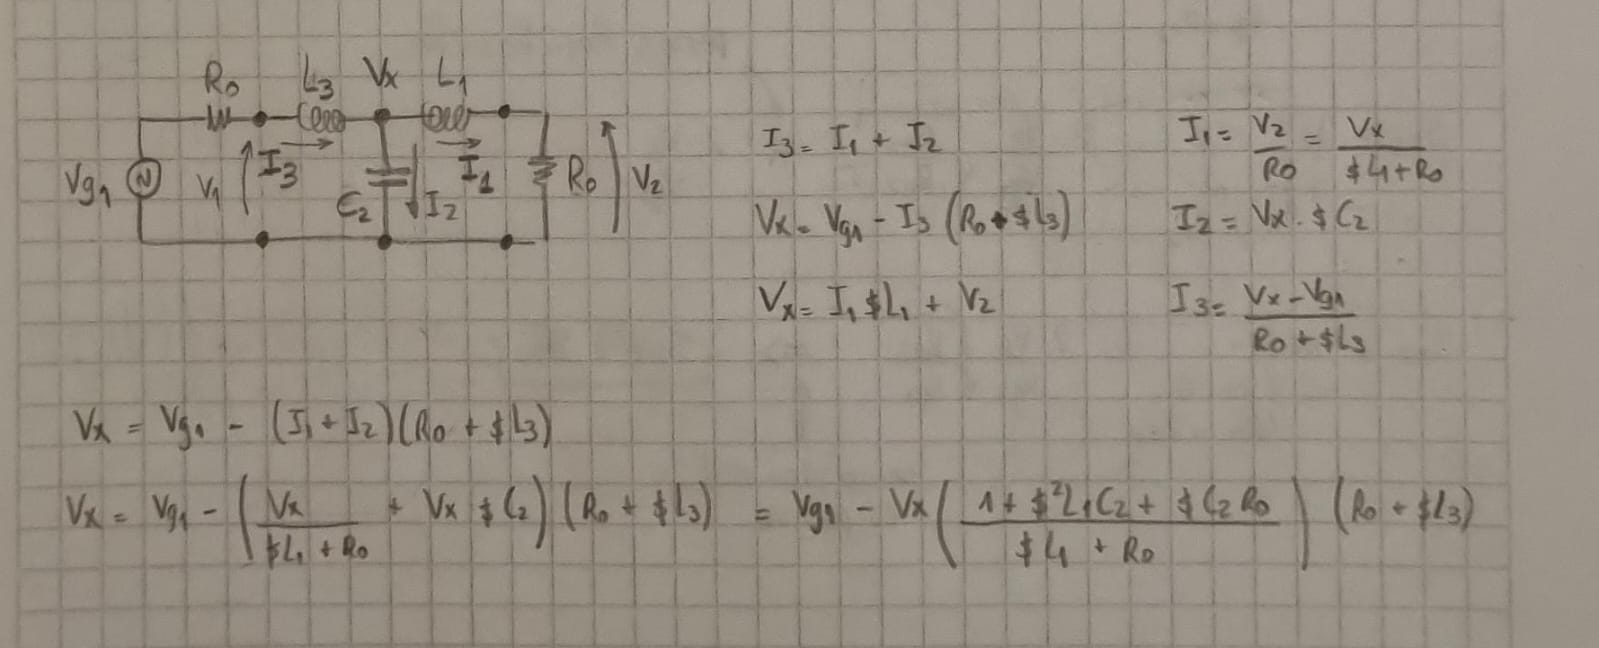

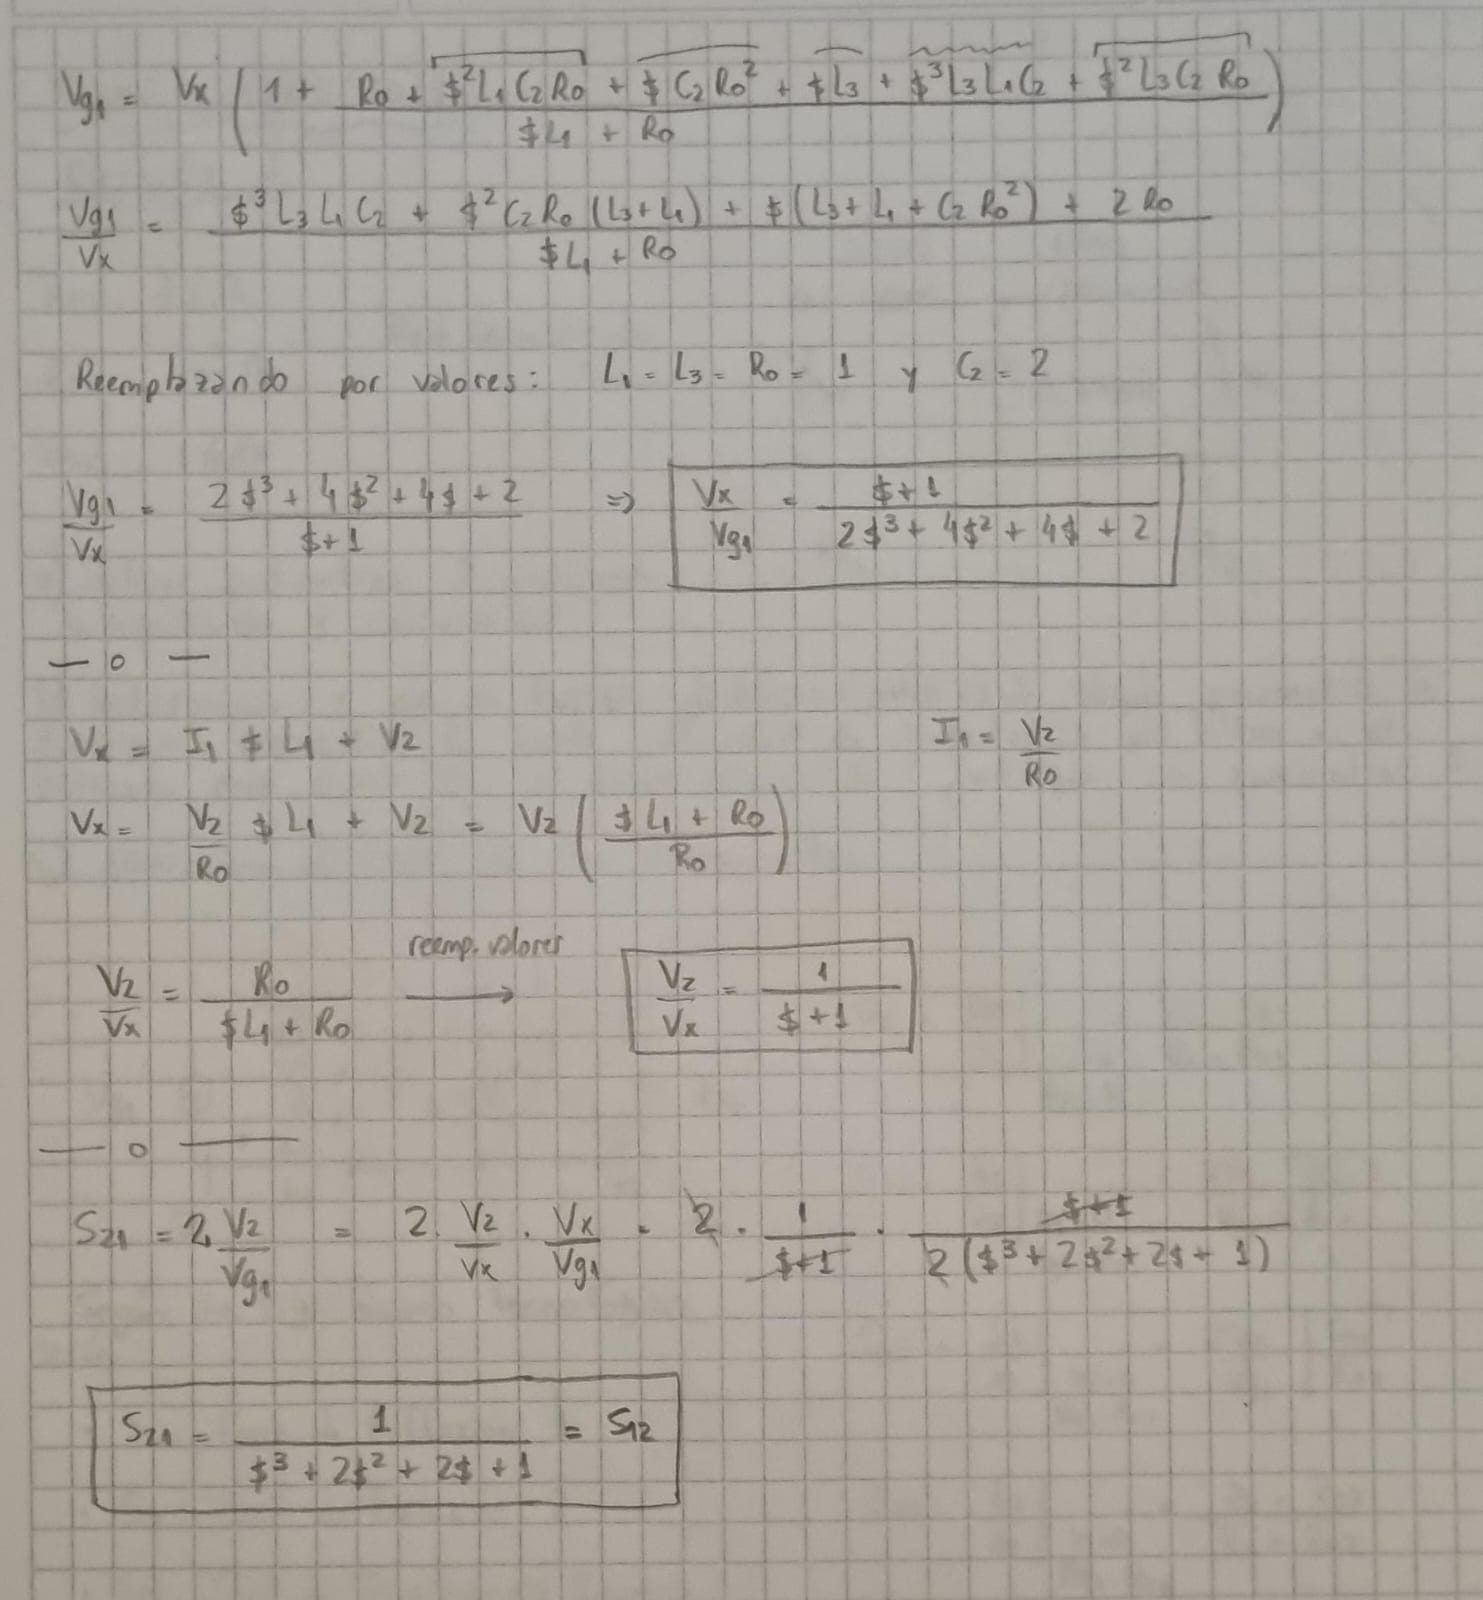

In [10]:
from sympy import *

s = symbols('s')

A = L_3 * L_1 * C_2
B = C_2 * R_O * (L_3 + L_1)
C = L_3 + L_1 + C_2 * R_O * R_O
D = 2 * R_O
E = 0
F = 0
G = L_1
H = R_O

VG1_VX = (A * s**3 + B * s**2 + C * s + D)/(E * s**3 + F * s**2 + G * s + H)
VX_VG1 = 1/VG1_VX
VX_VG1

(s + 1)/(2*s**3 + 4*s**2 + 4*s + 2)

In [11]:
V2_VX = R_O / (s*L_1 + R_O)
V2_VX

1/(s + 1)

In [12]:
#S_21 = 2 * V2/VG1

S_21 = 2 * V2_VX * VX_VG1
S_21.simplify()

1/(s**3 + 2*s**2 + 2*s + 1)

Se verifica entonces que 
$$ S_{21} = S_{12} = \frac{1}{s^3 + 2 s^2 + 2 s + 1} $$

Analizamos $S_{11}$ y $S_{21}$ con la funcionalidad $analyzeSys()$ de $pytc2$

Análisis para $S_{11}$

<IPython.core.display.Math object>

[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 ['none', []],
 [3,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

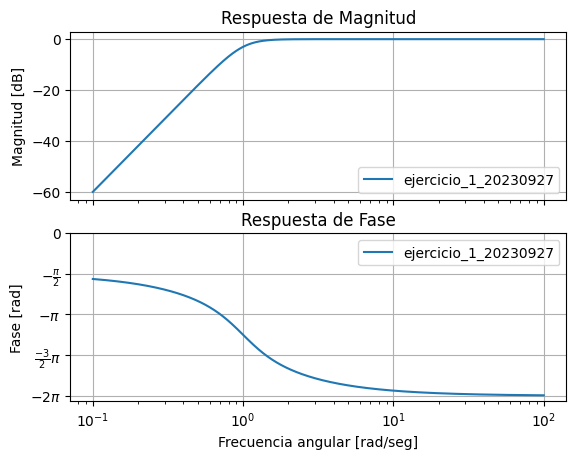

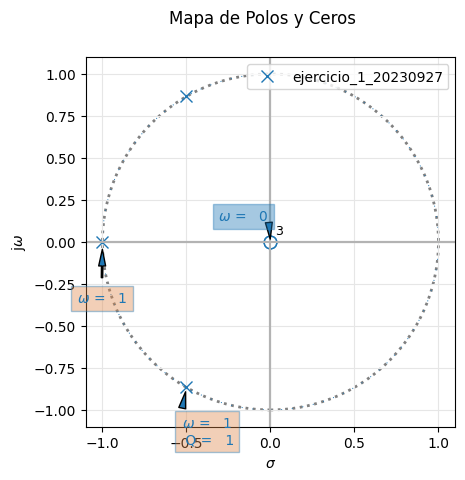

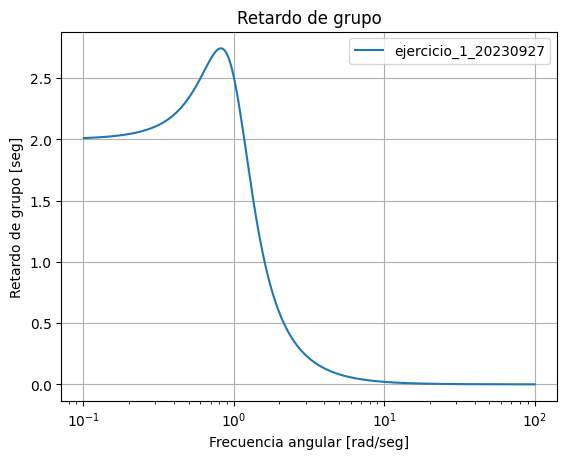

In [14]:
# Importación de librerías necesarias para ejecutar el script
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig

# Con los datos definidos anteriormente, se arman los array de la transferencia.
kn = 1
kp = 1

num = kn * np.array([1, 0, 0, 0])
den = kp * np.array([1, 2, 2, 1])
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
pretty_print_SOS(tf_bicuad_sos)
plt.close('all')

# Plotear de forma silenciosa las características de mi función 
analyze_sys([sig.TransferFunction(num,den)], 'ejercicio_1_20230927', same_figs=False)

Análisis para $S_{21}$

C:\Users\Mati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


<IPython.core.display.Math object>

C:\Users\Mati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 ['none', []],
 [3,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

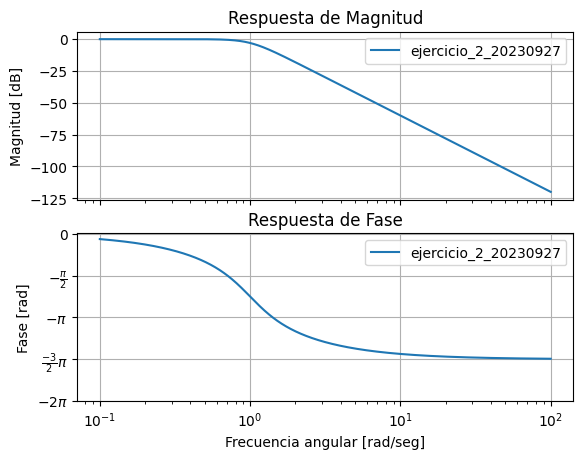

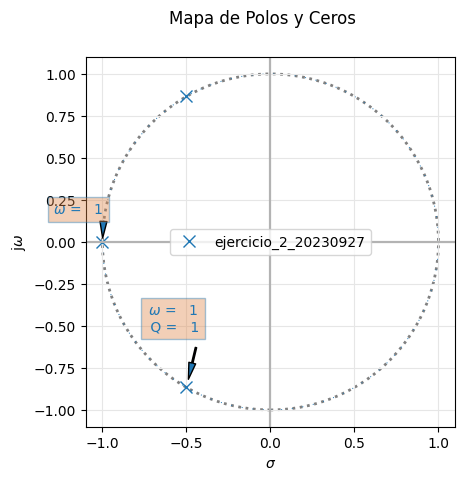

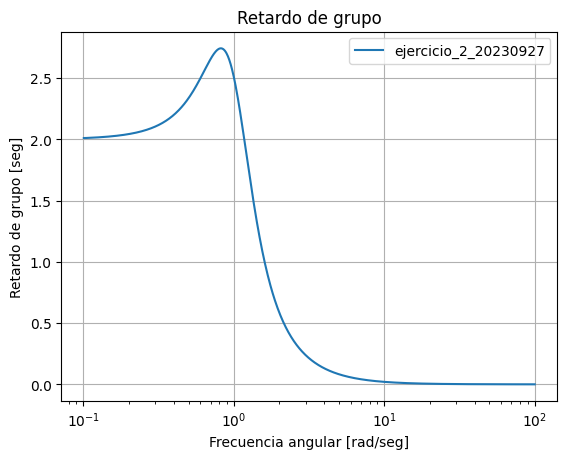

In [13]:
# Importación de librerías necesarias para ejecutar el script
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig

# Con los datos definidos anteriormente, se arman los array de la transferencia.
kn = 1
kp = 1

num = kn * np.array([0, 0, 0, 1])
den = kp * np.array([1, 2, 2, 1])
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
pretty_print_SOS(tf_bicuad_sos)
plt.close('all')

# Plotear de forma silenciosa las características de mi función 
analyze_sys([sig.TransferFunction(num,den)], 'ejercicio_1_20230927', same_figs=False)

### Conclusiones

Se puede observar por la transferencia de $S_{11}$ que el circuito se encuentra adaptado para el caso analizado, es decir, a la frecuencia normalizada.
Además, analizando $S_{21}$ se observa que se comporta como un filtro pasa bajo de tercer orden, y la transferencia es igual a la de un butterworth.